## Homework 4
### Theory Part

**Q1**  Consider a layer in CNN that takes in a single channel input of 64 × 64, and has 96
filters. In each of the following cases, compute the number of parameters that are learned in this
layer. We assume that bias is present for each weight.

[1] A convolution layer with filters of same size as the input.
$$ Param = (ksize^2 + 1)*channel$$ 
$$ Param = (64^2 + 1) * 96 $$
$$ Param = 393312 $$

In [1]:
(64**2 + 1)* 96 

393312


[2] A convolution layer with 8 × 8 filters with stride of 4

$$ Param = (ksize)^2 * channel + bias $$
$$ Param = (8^2 + 1) * 96 $$
$$ Param = 6240 $$



In [2]:
(8**2 + 1) * 96 

6240


[3]. A convolution layer with 1 × 1 filter and a stride of 1

$$ Param = (ksize)^2 * channel + bias $$
$$ Param = (1^2+ 1) * 96  $$
$$ Param = 192 $$

---

**Q2** Suppose you would have a neuron which has an RBF kernel as activation function (remember
the evil wolf? Drop your linear style of thoughts. Circumferential thoughts can be nice too.)

$$ y = exp(-(x_1^2 + x_2^2)) + b$$

with parameter b. _What would be the shapes realized by the set of points {$(x1, x2) : y((x1, x2)) =
0$} as a function of b ? Explain in at most 2 sentences and/or a little math._

$$ 0 = exp(-(x_1^2 + x_2^2)) + b $$

$$ -b = exp(-(x_1^2 + x_2^2)) $$

$$ -ln(-b) = x_1^2 + x_2^2 $$

Therefore, it is a circle centered around the origin with radius $\sqrt{-ln(-b)}$. Obviously this is only valid when $-1 < b < 0$.

---

Supposed now we add weight, 

$$ y = exp(-(w_1x_1^2 + w_2x_2^2)) + b$$

_what shapes can we realize now?  Explain in at most 5 sentences and/or a little math. You
can make references to publicly available in the internet materials to explain._

$$ -ln(-b) = w_1x_1^2 + w_2x_2^2 $$

$$ -ln(-b) = \frac{x_1^2}{w_1^{-1}} + \frac{x_2^2}{w_2^{-1}} $$

$$ 1 = \frac{x_1^2}{-ln(-b) \cdot w_1^{-1}} + \frac{x_2^2}{-ln(-b) \cdot w_2^{-1}} $$

$$ 1 = \left(\frac{x_1}{ \sqrt{-ln(-b) \cdot w_1^{-1}}}\right)^2 + \left(\frac{x_2}{\sqrt{-ln(-b) \cdot w_2^{-1}}}\right)^2 $$

hence it is an ellipse, centered around the origin with radius $\sqrt{-ln(-b) \cdot w_1^{-1}}$ along the $x_1$ axis and radius $\sqrt{-ln(-b) \cdot w_2^{-1}}$ along the $x_2$ axis.

---

**Q3** Suppose you have five linear neurons neurons n1, . . . , n5, realizing above decision boundaries
as shown in Figure 1. That is: for every decision boundary we have outputs are = 0.5 in the zones
marked with red plusses, and = 0.2 in the zones marked with the blue minuses.

![figure1](figure1.jpg)

As you know,
each neuron is realized by:

$$ n_i = 0.3H(w^{(i)}_1x_1 + w^{(i)}_2 x_2 + b^{(i)}) + 0.2, \quad H(z) ∈ {0, 1} $$

where H is the threshold activation function. You want to predict positive values in a shape marked in green in Figure 1. You want to achieve this prediction by combining these neurons using a threshold neuron H:

$$ y = H(\sum_{i} v_i^* n_i + b^*) $$

[1] _what do you have to do with the weights of $n_5$ so that you can move the decision boundary
of $n_5$ so that you can realize the shape in green shown above (in the sense of having positive
values inside and negative values outside.)? Give a qualitative description. Note: Give a
qualitative description in 3 sentences at most. Note that there is an x- and an y-axis, which
helps you to express vectors qualitatively._

The position of the decision boundary of $n_5$ depends on its weight and biases. Particularly, the ratio between $w_1$ and $w_2$ determines the slant of the boundary, while the ratio between the $b$ and $w_2$ determines its offset from origin. As the desired position is a shift upwards (given that the boundary continues infinitely), we want to decrease $b$ so that the boundaries shift upwards.


[2] _after moving the decision boundary of n5 appropriately, the green shape looks a bit like an
logical AND-combination of the +-zones for every neuron. How to choose the weights $v^∗_i$ and the bias $b^∗$ in $ y = H(\sum_{i} v_i^* n_i + b^*) $ so that you can realize the green shape (in the sense of having positive values inside and
negative values outside that shape)? Note: $n_i$ gives out values either 0.5 or 0.2_

Lets say that function $H$ has a threshold $h = 0$, such that

$$ H(z) = 1[z > h] = 1[z > 0] $$

If we were to take green area as {+1}, for the threshold neuron to fire $+1$, we will need all neurons $n_i$ to fire 0.5,

$$ 1 = H(\sum_{i} 0.5 v_i^* +b^*) $$

$$ 1 = 1[(\sum_{i} 0.5 v_i^* +b^*) > 0] $$

$$ (\sum_{i} 0.5 v_i^* +b^*) > 0 \quad -- \quad (1)$$

If we were to take non-green area as {-1}, for the threshold neuron to fire $-1$, we will need at least one neuron $n_j$ to fire 0.2,

$$ 0 = H(\sum_{i-1}  v_i^* n_i + v_j^* n_j + b^*) $$

$$ 0 = H(\sum_{i-1}  0.5v_i^* + 0.2v_j^* + b^*) $$

$$ 0 = 1[\sum_{i-1}  0.5v_i^* + 0.2v_j^* + b^* > 0] $$

$$ \sum_{i-1}  0.5v_i^* + 0.2v_j^* + b^* <= 0 \quad -- \quad (2) $$

For simplicity, we set $v_i^* = 1$ for all $i$. Finding $b$, 

$$ 0.5 \cdot 5 +b^* > 0 \quad -- \quad (1)$$

$$ 2.5 + b^* > 0 $$

$$ b^* > -2.5 $$

$$ 0.5 \cdot 4 + 0.2 + b^* <= 0 \quad -- \quad (2) $$

$$ 2.2 + b^* <= 0 $$

$$ b^* <= -2.2 $$

$$ therefore \quad -2.5 < b <= -2.2 $$

we can pick any $b$ within this range, e.g. $ b = -2.4 $ with our $ v_i^* = 1$, such that

$$ H(\sum_{i} 0.5  -2.4 ) = H(2.5 - 2.4) \quad for\space all\space n_i = 0.5$$
$$ = H(0.1) = 1[0.1 > 0] = 1 \quad (green)$$

$$ H(\sum_{i-1} 0.5 + 0.2  -2.4 ) = H(2.2 - 2.4) \quad for\space four\space n_i = 0.5 \space and\space one\space n_j = 0.2$$
$$ = H(-0.2) = 1[-0.2 > 0] = 0 \quad (outside)$$


### Coding - Part 1

For this section, there is a script called `hw4_code.py` that will hold some definitions e.g. the `FlowerDataset` class and `train_model` function.

Below we will do some sanity check on the dataset.

label: 45
label: 87
label: 20


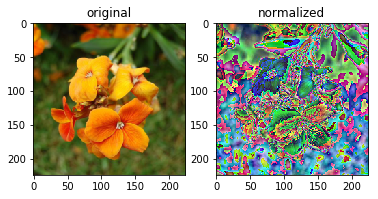

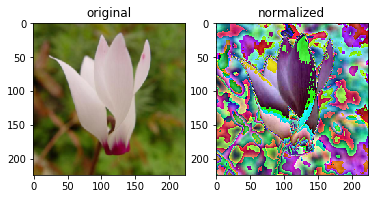

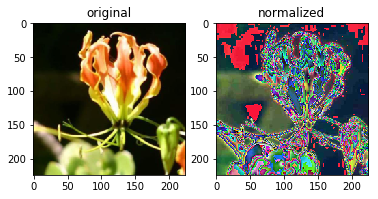

In [84]:
from hw4_code import *
import matplotlib.pyplot as plt
from torchvision import transforms

# testing dataset
flower_dataset = FlowerDataset('..\\datasets\\flowersstuff\\102flowers\\flowers_data', mode='train')
flower_dataset_val = FlowerDataset('..\\datasets\\flowersstuff\\102flowers\\flowers_data', mode='val')

for i in range(3):
    flower1 = flower_dataset[i]
    print('label:',flower1['label'])
    image = transforms.ToPILImage()(flower1['image'])

    invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                         std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                    transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                         std = [ 1., 1., 1. ]),
                                    transforms.ToPILImage(),
                                   ])
    clear_image = invTrans(flower1['image'])

    plt.figure()
    plt.subplot(121)
    plt.imshow(clear_image)
    plt.title('original')
    plt.subplot(122)
    plt.imshow(image)
    plt.title('normalized')

We will then use resnet models to classify our flowers.

In [4]:
# Getting pretrained resnet
from torchvision import models

def get_pretrained_resnet(use_gpu=True):
    model = models.resnet18(pretrained=True)
    if use_gpu:
        model = model.cuda(0)
    return model

resnetmodel = get_pretrained_resnet()
resnet_dict = resnetmodel.state_dict()
# for k in resnet_dict.keys():
#     if 'bn' not in k and 'down' not in k:
#         # printing any statedict without batch-norm and downsample
#         print(k)

In [5]:
# training with various learn rate
for lr in [0.1, 1, 10]:
    print("\n\nWith learning rate {},\n".format(lr))
    learnrate = lr
    optimizer = optim.SGD(resnetmodel.parameters(), lr=learnrate, momentum=0.9)

    trainedmodel = train_model(flower_dataset, resnetmodel, optimizer, 
                               epoch=1, mode='train', use_gpu=True, print_every=1)
    trainedmodel = train_model(flower_dataset_val, trainedmodel, optimizer, 
                               epoch=1, mode='val', use_gpu=True, print_every=1)



With learning rate 0.1,

[train] - Epoch 0..
      >> Epoch loss 1.84155 accuracy 0.032                      in 446.3549s
[val] - Epoch 0..
      >> Epoch loss 1.62162 accuracy 0.088                      in 28.9867s


With learning rate 1,

[train] - Epoch 0..
      >> Epoch loss 0.68266 accuracy 0.462                      in 437.4866s
[val] - Epoch 0..
      >> Epoch loss 0.20868 accuracy 0.795                      in 33.7598s


With learning rate 10,

[train] - Epoch 0..
      >> Epoch loss 0.44307 accuracy 0.559                      in 438.3159s
[val] - Epoch 0..
      >> Epoch loss 0.15011 accuracy 0.837                      in 28.1213s


In [6]:
# now lets do the same thing, but train with an empty resnet

def get_empty_resnet(use_gpu=True):
    model = models.resnet18(pretrained=False)
    if use_gpu:
        model = model.cuda(0)
    return model

emptymodel = get_pretrained_resnet()
empty_dict = resnetmodel.state_dict()
# for k in empty_dict.keys():
#     if 'bn' not in k and 'down' not in k:
#         # printing any statedict without batch-norm and downsample
#         print(k)

In [7]:
# training with various learn rate
for lr in [0.1, 1, 10]:
    print("\n\nWith learning rate {},\n".format(lr))
    learnrate = lr
    optimizer = optim.SGD(emptymodel.parameters(), lr=learnrate, momentum=0.9)

    trainedmodel = train_model(flower_dataset, emptymodel, optimizer, 
                               epoch=1, mode='train', use_gpu=True, print_every=1)
    trainedmodel = train_model(flower_dataset_val, trainedmodel, optimizer, 
                               epoch=1, mode='val', use_gpu=True, print_every=1)



With learning rate 0.1,

[train] - Epoch 0..
      >> Epoch loss 1.84189 accuracy 0.033                      in 437.1789s
[val] - Epoch 0..
      >> Epoch loss 1.61854 accuracy 0.087                      in 28.1587s


With learning rate 1,

[train] - Epoch 0..
      >> Epoch loss 0.68072 accuracy 0.458                      in 439.9016s
[val] - Epoch 0..
      >> Epoch loss 0.20165 accuracy 0.789                      in 27.8535s


With learning rate 10,

[train] - Epoch 0..
      >> Epoch loss 0.43625 accuracy 0.569                      in 435.8893s
[val] - Epoch 0..
      >> Epoch loss 0.15598 accuracy 0.828                      in 27.9031s


In [8]:
# now lets do the same thing, but train with an empty resnet
import torch.nn as nn

def get_unfrozen_resnet(numcl, use_gpu=True):
    model = models.resnet18(pretrained=False)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, numcl)
    if use_gpu:
        model = model.cuda(0)
    return model

unfrozenmodel = get_pretrained_resnet()
unfrozen_dict = resnetmodel.state_dict()
# for k in unfrozen_dict.keys():
#     if 'bn' not in k and 'down' not in k:
#         # printing any statedict without batch-norm and downsample
#         print(k)

In [9]:
# training with various learn rate
for lr in [0.1, 1, 10]:
    print("\n\nWith learning rate {},\n".format(lr))
    learnrate = lr
    optimizer = optim.SGD(unfrozenmodel.parameters(), lr=learnrate, momentum=0.9)

    trainedmodel = train_model(flower_dataset, unfrozenmodel, optimizer, 
                               epoch=1, mode='train', use_gpu=True, print_every=1)
    trainedmodel = train_model(flower_dataset_val, trainedmodel, optimizer, 
                               epoch=1, mode='val', use_gpu=True, print_every=1)



With learning rate 0.1,

[train] - Epoch 0..
      >> Epoch loss 1.84166 accuracy 0.033                      in 437.0670s
[val] - Epoch 0..
      >> Epoch loss 1.62038 accuracy 0.092                      in 28.1243s


With learning rate 1,

[train] - Epoch 0..
      >> Epoch loss 0.68146 accuracy 0.461                      in 436.3131s
[val] - Epoch 0..
      >> Epoch loss 0.20818 accuracy 0.784                      in 27.8541s


With learning rate 10,

[train] - Epoch 0..
      >> Epoch loss 0.43975 accuracy 0.566                      in 435.7458s
[val] - Epoch 0..
      >> Epoch loss 0.18098 accuracy 0.817                      in 27.9208s


samples with positive class: 2000 
samples with negative class: 8000


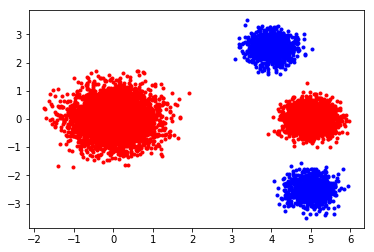

In [10]:
from hw4_code2 import *
import numpy as np

data, label = from_text('samplestr.txt')
true_mask = label.reshape((-1)).astype(bool)
false_mask = (1-label).reshape((-1)).astype(bool)

data_true = np.transpose(data[true_mask])
data_false = np.transpose(data[false_mask])

print('samples with positive class:', len(data_true[0]),
      '\nsamples with negative class:', len(data_false[0]))

plt.plot(data_true[0], data_true[1], '.b')
plt.plot(data_false[0], data_false[1], '.r')

In [54]:
'''
Creating a new Neural Network
'''
from torch import nn
import torch.nn.functional as F

class OurNet(nn.Module):
    def __init__(self):
        super(OurNet, self).__init__()
        self.fc = nn.Linear(2, 1)
    
    def forward(self, x):
        x = F.relu(self.fc(x))
        return x

our_net = OurNet()
print(our_net)

OurNet(
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


In [55]:
# testing the Dataset subclass from hw4_code2

train_set = ImbaDataset('.', mode='train')
print('train:',train_set[2])
test_set = ImbaDataset('.', mode='test')
print('test:', test_set[2])

train: {'data': tensor([ 0.7959,  0.3896], dtype=torch.float64), 'label': tensor([ 0.], dtype=torch.float64)}
test: {'data': tensor([-0.5324, -0.7683], dtype=torch.float64), 'label': tensor([ 0.], dtype=torch.float64)}


In [78]:
# simple training
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.sampler import WeightedRandomSampler

our_net = OurNet().double()
optimizer = optim.SGD(our_net.parameters(), lr=0.1)
criterion = nn.BCEWithLogitsLoss()

def train_ournet(dataset, model, optimizer, criterion, batch_sampler=None, 
                 mode='train', positive_weight=1):
    '''
    positive_weight : weight of the accuracy of positive classes compared to negative classes
                      e.g. 2 means positive classes has 2x the weight of negative classes
    '''
    print_truecount = True
    if batch_sampler:
        loader = DataLoader(dataset, batch_sampler=batch_sampler)
    else:
        loader = DataLoader(dataset, batch_size=128)
    running_loss = 0
    running_corrects = 0
    total_data = 0
    
    for inputdata in loader:
        data = Variable(inputdata['data'])
        labels = Variable(inputdata['label']).view(-1,1)
        if print_truecount:
            print('True count:', labels.sum().item(), 'out of', len(labels), 
                  "({}%)".format(labels.sum().item() * 100 / len(labels)))
            print_truecount = False
        
        outputs = model.forward(data)
        predictions = (outputs > 0)
#         predictions = predictions.view(-1,1)
#         print(predictions)
        
#         print(outputs.shape, predictions.shape, labels.shape)

        loss = criterion(outputs, labels)
        if mode == 'train':
            loss.backward()
            optimizer.step()    
            
        # balanced stuff
        total_data = len(labels) + (positive_weight - 1) * labels.sum().item()
        corrects = (predictions.double().cpu() == labels.cpu()).double()
        weights = (positive_weight - 1) * labels.cpu() + 1
        
#         print(corrects, weights)
        
        running_corrects += (corrects * weights).sum().item() #/ float(128*100)
        running_loss += loss.item()

        
    running_corrects /= float(128*100)
    if mode == 'train':
        print("Trained with accuracy {} and loss {}\n".format(running_corrects, running_loss))
    elif mode == 'test':
        print("Tested with accuracy {} and loss {}\n".format(running_corrects, running_loss))
    return model
    


In [79]:
our_net_trained = train_ournet(train_set, our_net, optimizer, criterion)
our_net_trained = train_ournet(train_set, our_net_trained, optimizer, criterion, mode='test')   
our_net_trained = train_ournet(test_set, our_net_trained, optimizer, criterion, mode='test')
print(our_net_trained.state_dict())

True count: 0.0 out of 128 (0.0%)
Trained with accuracy 0.661875 and loss 50.083123524533946

True count: 0.0 out of 128 (0.0%)
Tested with accuracy 0.469140625 and loss 137.29122373346388

True count: 0.0 out of 128 (0.0%)
Tested with accuracy 0.469453125 and loss 138.7583834355911

OrderedDict([('fc.weight', tensor([[ 4.5108, -2.6470]], dtype=torch.float64)), ('fc.bias', tensor([-18.0480], dtype=torch.float64))])


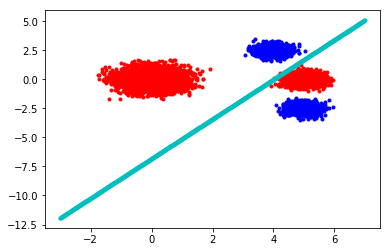

In [80]:
w = our_net_trained.state_dict()['fc.weight']
b = our_net_trained.state_dict()['fc.bias']
w1 = w[0,0].item()
w2 = w[0,1].item()
b1 = b[0].item()

m = -w1/w2
c = -b/w2

line_x = [ i/100 for i in range(-300, 700)]
line_y = [ m*i + c for i in line_x]

plt.plot(data_true[0], data_true[1], '.b')
plt.plot(data_false[0], data_false[1], '.r')
plt.plot(line_x, line_y, '.c')

To achieve 50-50 on minibatches, we need a Sampler subclass.

In [81]:
class OurBatchSampler(object):
    r"""
    Special batch sampler class that ensures a 50-50
    dataset classes.
    """

    def __init__(self, dataset, batch_size, iteration):
        self.dataset = dataset
        self.batch_size = batch_size
        self.iteration = iteration
        
        self.idx_plus = [idx for idx in range(len(dataset)) if dataset[idx]['label'].item() > 0]
        self.idx_minus = [idx for idx in range(len(dataset)) if idx not in self.idx_plus]

    def __iter__(self):
        batch = []
        for i in range(self.iteration):
            idplus = np.random.choice(self.idx_plus, self.batch_size // 2).tolist()
            idminus = np.random.choice(self.idx_minus, self.batch_size // 2).tolist()
            batch += idplus + idminus
                
            yield batch
            batch = []

    def __len__(self):
        return self.batch_size * self.iteration

train_sampler = OurBatchSampler(train_set, 128, 100)
print('train sampler built')
test_sampler = OurBatchSampler(test_set, 128, 100)
print('test sampler built')

train sampler built
test sampler built


In [82]:
our_net_trained = train_ournet(train_set, our_net, optimizer, criterion, 
                               batch_sampler=train_sampler, positive_weight=4)
our_net_trained = train_ournet(train_set, our_net_trained, optimizer, 
                               criterion, batch_sampler=train_sampler, mode='test', positive_weight=4)   
our_net_trained = train_ournet(test_set, our_net_trained, optimizer, 
                               criterion, batch_sampler=train_sampler, mode='test', positive_weight=4)
print(our_net_trained.state_dict())

True count: 64.0 out of 128 (50.0%)
Trained with accuracy 0.608984375 and loss 71.24207535309189

True count: 64.0 out of 128 (50.0%)
Tested with accuracy 0.5 and loss 69.31471805599467

True count: 64.0 out of 128 (50.0%)
Tested with accuracy 0.49984375 and loss 69.35526205653024

OrderedDict([('fc.weight', tensor([[-22.7017, -17.4655]], dtype=torch.float64)), ('fc.bias', tensor([-48.6803], dtype=torch.float64))])


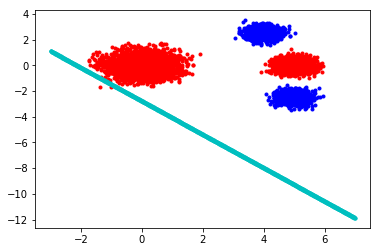

In [83]:
w = our_net_trained.state_dict()['fc.weight']
b = our_net_trained.state_dict()['fc.bias']
w1 = w[0,0].item()
w2 = w[0,1].item()
b1 = b[0].item()

m = -w1/w2
c = -b/w2

line_x = [ i/100 for i in range(-300, 700)]
line_y = [ m*i + c for i in line_x]

plt.plot(data_true[0], data_true[1], '.b')
plt.plot(data_false[0], data_false[1], '.r')
plt.plot(line_x, line_y, '.c')